<a href="https://colab.research.google.com/github/karimkhalil-byte/storytelling-with-data/blob/master/data_stories/MLS-soccer/MLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This demonstration notebook provides a suggested set of libraries that you might find useful in crafting your data stories.  You should comment out or delete libraries that you don't use in your analysis.

In [2]:
#number crunching
import numpy as np
import pandas as pd
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

# Google authentication

Run the next cell to enable use of your Google credentials in uploading and downloading data via Google Drive.  See tutorial [here](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=P3KX0Sm0E2sF) for interacting with data via Google services.

# Project team

List your team members and (as appropriate) each team member's role on this project.

# Background and overview

Introduce your question and motivation here.  Link to other resources or related work as appropriate.

# Approach

Briefly describe (at a high level) the approach you'll be taking to answer or explore your question in this notebook.

# Quick summary

Briefly describe your key findings at a high level.



# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [16]:
# Provide code for downloading or importing your data here
url = "https://github.com/karimkhalil-byte/storytelling-with-data/raw/master/data-stories/MLS-soccer/all_players.csv"
ofield = pd.read_csv(url).drop(['GWG','PKG/A','HmG','RdG','GWA','HmA','RdA','Season','Year','OFF','FS','FC','YC','RC'], axis=1)
url2 = "https://github.com/karimkhalil-byte/storytelling-with-data/raw/master/data-stories/MLS-soccer/tableMLS.xlsx"
mls_table = pd.read_excel(url2)
mls_table

,Pos,Team,GP,W,L,SW,GF,GA,GD,Pts,Qualification,Conference,Year
0,1,New York City FC,34,18,6,NaN,63,42,21,64,Playoffs Conference Semifinals & 2020 CONCACAF...,Eastern Conference,2019
1,2,Atlanta United FC,34,18,12,NaN,58,43,15,58,Playoffs first round & 2020 CONCACAF Champions...,Eastern Conference,2019
2,3,Philadelphia Union,34,16,11,NaN,58,50,8,55,Playoffs first round & 2020 Leagues Cup,Eastern Conference,2019
3,4,Toronto FC[b],34,13,10,NaN,57,52,5,50,Playoffs first round & 2020 Leagues Cup,Eastern Conference,2019
4,5,D.C. United,34,13,10,NaN,42,38,4,50,Playoffs first round & 2020 Leagues Cup,Eastern Conference,2019
5,6,New York Red Bulls,34,14,14,NaN,53,51,2,48,Playoffs first round & 2020 Leagues Cup,Eastern Conference,2019
6,7,New England Revolution,34,11,11,NaN,50,57,‚àí7,45,Playoffs first round,Eastern Conference,2019
7,8,Chicago Fire,34,10,12,NaN,55,47,8,42,NaN,Eastern Conference,2019
8,9,Montreal Impact[b],34,12,17,NaN,47,60,‚àí13,41,2020 CONCACAF Champions League[c],Eastern Conference,2019
9,10,Columbus Crew SC,34,10,16,NaN,39,47,‚àí8,38,NaN,Eastern Conference,2019


In [9]:
fig = px.funnel(mls_table[], x='Pos', y='Team')
fig.show()

In [24]:
fig = px.bar(mls_table, x="Team", y=[ "W", "L"], title="GP/W/L", )
fig.show()

In [25]:
?px.bar

In [12]:
#COMPARING CLUBS
#group by club
ofield_by_club = ofield.groupby('Club').mean()
of = ofield_by_club.drop(['GHA','JAM','MCF','MTQ','ROC','CIV','ECU','USA'], axis=0)
of.head()

,GP,GS,MINS,G,A,SHTS,SOG,G/90min,SC%,A/90min,SOG%
Club,,,,,,,,,,,
ATL,15.709402,11.769231,1066.538462,2.008547,1.444444,15.743590,6.000000,0.135214,7.823932,0.087179,33.795747
CAN,10.200000,7.200000,686.600000,0.400000,0.000000,3.000000,0.600000,0.098000,10.660000,0.000000,18.332500
CHI,15.824959,12.311183,1109.640194,1.810373,1.839546,16.144246,6.576985,0.129481,8.026742,0.125964,36.987968
CHV,14.448529,11.290441,1012.415441,1.213235,1.136029,12.448529,4.830882,0.090368,6.474265,0.092059,36.904259
CIN,14.728261,11.402174,1029.532609,1.086957,1.152174,13.086957,4.369565,0.077717,4.891304,0.081522,28.930694


In [13]:
of.sort_values(by=['GP'], inplace=True, ascending = False)
of.head()

,GP,GS,MINS,G,A,SHTS,SOG,G/90min,SC%,A/90min,SOG%
Club,,,,,,,,,,,
DC,18.831081,15.358108,1368.290541,2.297297,2.486486,20.939189,7.290541,0.122095,7.360135,0.129797,29.846412
NE,18.827338,14.575540,1307.525180,1.733813,1.834532,18.719424,6.474820,0.104388,5.797842,0.111583,30.268103
LAFC,18.768293,15.536585,1400.402439,3.658537,2.475610,24.585366,9.963415,0.182317,9.181707,0.151707,33.378630
NSH,18.158879,14.523364,1309.392523,1.514019,1.626168,15.018692,5.373832,0.101589,6.441121,0.097103,34.270938
MIA,18.155000,14.565000,1318.570000,1.865000,2.450000,17.360000,6.810000,0.109900,7.510500,0.140200,35.620819


In [14]:
#bar graph for all clubs, how good is the average player on each club
fig = px.bar(of.reset_index(), x="Club", y="GP", color="G", title="Avg games per player/ Avg goals per player on each Team")
fig.show()

In [15]:
fig = px.bar(of.reset_index(), x="Club", y="GP", color="A", title="Avg games per player/ Avg assists per player on each Team")
fig.show()

In [ ]:
ofield['POS'] = ofield['POS'].str.replace(r'D-M', 'M-D', regex = True)
ofield['POS'] = ofield['POS'].str.replace(r'F-M', 'M-F', regex = True)

In [ ]:
ofield.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,G/90min,SC%,A/90min,SOG%
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,0.94,35.5,0.14,64.47
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,0.88,23.0,0.08,49.00
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,0.81,24.1,0.27,64.37
3,Preki,KC,M,32,32,2880,18,13,140,61,0.56,12.9,0.41,43.57
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,0.66,21.5,0.12,55.70


In [ ]:
#GP vs Goal scored for each player based on position
fig = px.scatter(data_frame= ofield.reset_index(), x='GP', y='G', color = 'POS')
fig.show()

In [ ]:
#GP vs Assist for each player based on position
fig = px.scatter(data_frame= ofield.reset_index(), x='GP', y='A', color = 'POS')
fig.show()

In [ ]:
ofield[['Player', 'Club','GP','G']].dropna(subset=['Club'])

,Player,Club,GP,G
0,Roy Lassiter,TB,30,27
1,Raul Diaz Arce,DC,28,23
2,Eduardo Hurtado,LA,26,21
3,Preki,KC,32,18
4,Brian McBride,CLB,28,17
...,...,...,...,...
15296,Sebastian Mendez,ORL,19,0
15297,Kelyn Rowe,NE,16,0
15298,Siem de Jong,CIN,15,0
15299,Maxime Chanot,NYC,20,0


In [ ]:
#Games played vs Goals per player based on each club
#x1 = ofield[['Player', 'Club','GP','G']].dropna(subset=['Club'])
#fig = px.scatter(data_frame=x1, x='GP', y='G', color='Club')
#fig.show()

In [ ]:
ofield.groupby('POS').mean() # is this the table you're trying to make?

,GP,GS,MINS,G,A,SHTS,SOG,G/90min,SC%,A/90min,SOG%
POS,,,,,,,,,,,
D,10.622798,9.370370,840.804567,0.382416,0.622078,4.788026,1.615426,0.031469,4.510626,0.052496,NaN
F,10.618008,7.075381,647.507329,2.673946,1.429255,18.903978,8.366437,0.238462,9.150224,0.141642,42.727184
M,11.081217,8.558322,767.971758,1.108456,1.633021,11.889539,4.487968,0.102084,5.613720,0.137901,35.689252
M-D,10.629073,8.526316,768.335840,0.604010,0.964912,7.388471,2.674185,0.045539,4.744612,0.088647,34.281165
M-F,10.528184,7.409186,671.828810,1.895616,1.774530,15.503132,6.551148,0.175950,7.895198,0.149896,39.953704


In [ ]:
# could also look at differences by club:
ofield.groupby(['POS', 'Club']).mean()

GP         GS         MINS         G         A       SHTS  \
POS Club                                                                     
D   ATL   15.781250  13.312500  1204.843750  0.500000  1.031250   6.281250   
    CAN   18.000000  18.000000  1575.000000  1.000000  0.000000   3.000000   
    CHI   15.289855  13.454106  1212.309179  0.632850  1.144928   7.038647   
    CHV   14.075269  12.376344  1105.903226  0.408602  0.666667   4.881720   
    CIN   14.769231  12.641026  1141.358974  0.666667  0.794872   8.307692   
...             ...        ...          ...       ...       ...        ...   
M-F SJ    18.142857  12.428571  1200.285714  5.428571  4.285714  32.714286   
    SKC   12.000000   6.500000   587.750000  1.250000  1.250000  17.750000   
    TB    13.000000   9.500000   820.333333  5.166667  2.500000  26.333333   
    TOR   10.833333   7.333333   654.166667  0.500000  1.000000  13.166667   
    VAN   18.800000  13.400000  1197.400000  4.000000  3.800000  30.000000   

                SOG   G/90min        SC%   A/90min       SOG%  
POS Club                                                       
D   ATL    1.843750  0.041250   6.828125  0.048750  31.195833  
    CAN    1.000000  0.060000  33.300000  0.000000  33.330000  
    CHI    2.502415  0.040531   6.866184  0.102609  33.773439  
    CHV    1.763441  0.028817   5.240860  0.039677  35.851176  
    CIN    2.512821  0.036923   4.294872  0.063590  24.333636  
...             ...       ...        ...       ...        ...  
M-F SJ    17.000000  0.415714  14.542857  0.228571  45.224286  
    SKC    4.500000  0.237500   6.600000  0.225000  23.303333  
    TB    11.833333  0.476667  22.050000  0.186667  44.776000  
    TOR    5.333333  0.031667   1.683333  0.133333  28.891667  
    VAN   12.400000  0.250000  10.880000  0.284000  44.258000  

[195 rows x 11 columns]

In [ ]:
#turn positions into numbers # JEREMY NOTE: i'm not sure why you're doing this step...
ofield_clust = ofield.copy()
#legend: Forward = 5, F-M = 4, M=3, M-D=2, D=1
pos_dictionary = {'D': 1, 'M-D' : 2, 'M':3,'M-F':4,'F':5 }
ofield_clust['POS'] = ofield_clust['POS'].apply(lambda x: pos_dictionary[x])
ofield_clust

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,G/90min,SC%,A/90min,SOG%
0,Roy Lassiter,TB,5,30,30,2580,27,4,76,49,0.94,35.5,0.14,64.47
1,Raul Diaz Arce,DC,5,28,28,2351,23,2,100,49,0.88,23.0,0.08,49.00
2,Eduardo Hurtado,LA,5,26,26,2323,21,7,87,56,0.81,24.1,0.27,64.37
3,Preki,KC,3,32,32,2880,18,13,140,61,0.56,12.9,0.41,43.57
4,Brian McBride,CLB,5,28,28,2307,17,3,79,44,0.66,21.5,0.12,55.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15762,Alejandro Pozuelo,NaN,3,1,1,120,0,0,5,0,0.00,0.0,0.00,0.00
15763,Franco Jara,NaN,5,2,2,210,0,0,5,1,0.00,0.0,0.00,20.00
15764,Andy Polo,NaN,3,1,1,105,0,0,6,3,0.00,0.0,0.00,50.00
15765,Cristian Roldan,NaN,3,4,4,360,0,0,6,1,0.00,0.0,0.00,16.67


In [21]:
!pip install hypertools

     |████████████████████████████████| 59 kB 3.8 MB/s 
     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=863618abf820cf5e85ad9397e2d063a5b1df7d7d11411b10ba0d3d0d2ca06f54
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=01f5b4b6798b365163a5598a9743cce63a3305c89f946ea1e6a99535384acacb
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [22]:
import hypertools as hyp

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



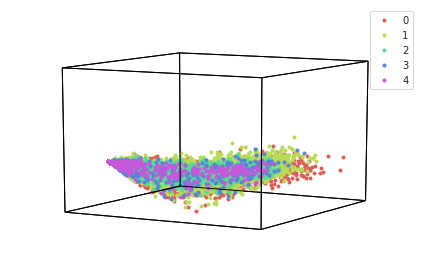

In [ ]:
columns = ['GS', 'GP', 'G',	'A',	'G/90min', 'A/90min']
hyp.plot(ofield[columns], '.', hue=ofield['POS'], reduce='IncrementalPCA', legend=True, ndims=3)

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



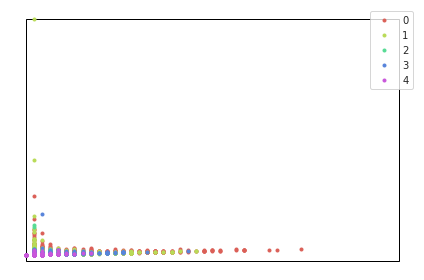

In [ ]:
columns = ['G',	'G/90min']
hyp.plot(ofield[columns], '.', hue=ofield['POS'], reduce='IncrementalPCA', legend=True, ndims=2)

/usr/local/lib/python3.7/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



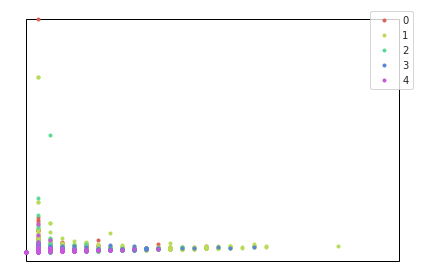

In [ ]:
columns = ['A',	'A/90min']
hyp.plot(ofield[columns], '.', hue=ofield['POS'], reduce='IncrementalPCA', legend=True, ndims=2)

# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [ ]:
# Provide code for carrying out the part of your analysis described
# in the previous text block.  Any statistics or figures should be displayed
# in the notebook.

# Interpretations and conclusions

Describe and discuss your findings and say how they answer your question (or how they failed to answer your question).  Also describe the current state of your project-- e.g., is this a "complete" story, or is further exploration needed?

# Future directions

Describe some open questions or tasks that another interested individual or group might be able to pick up from, using your work as a starting point.